<a href="https://colab.research.google.com/github/casualcomputer/Projects/blob/main/deep_learning_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch (Chapter 1-2)
Some ML notes: https://docs.google.com/spreadsheets/d/1DrQOawMitzhbGFfuwQs23NvZSylimy6nzfdE7_AvE1k/edit?usp=sharing

In [ ]:
pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 43.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.1+cu101 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.1+cu101 which is incompatible.


In [ ]:
#!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Note: We will be using the latest stable version of PyTorch so be sure to run the command above to install the latest version of PyTorch, which as the time of this tutorial was 1.2.0. We PyTorch belowing using the `torch` module. 

## Load pretrained models (resnet)

In [ ]:
import torch
from torchvision import models
dir(models)[1:10]
alexnet = models.AlexNet()
print(torch.__version__)

#pretrained model 
resnet = models.resnet101(pretrained=True)
resnet

1.7.1+cu101


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Image preprocessing 

In [ ]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256), # scale input image to 256 by 256 around center, transform to a tensor 
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)])

## Load an online image

In [ ]:
# load image 
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
 
import os
os.system('curl -O https://web.stanford.edu/~kterao/Homer.png')
img=plt.imread('Homer.png')
 
print('Data shape (before conversion):',img.shape)
print('Data type (before conversion):',type(img))
 
img_3_chanel= img[...,:3]
#img_3_chanel = img_3_chanel.astype(np.uint32) #doesn't work
print('Data type (after conversion):',type(img_3_chanel))
print("Data shape (after conversion):",img_3_chanel.shape)
 


Data shape (before conversion): (500, 300, 4)
Data type (before conversion): <class 'numpy.ndarray'>
Data type (after conversion): <class 'numpy.ndarray'>
Data shape (after conversion): (500, 300, 3)


## Classify an image (resnet)

In [ ]:
# importing Image class from PIL package
from PIL import Image
import requests
from io import BytesIO
# pic_url = "https://web.stanford.edu/~kterao/Homer.png" #why doesn't this picture load?
pic_url = "https://i.cbc.ca/1.1510833.1379101931!/httpImage/image.jpg_gen/derivatives/16x9_780/hi-teddy-bears-8col.jpg"
response = requests.get(pic_url)
im = Image.open(BytesIO(response.content))
im

# preprocess pipleline 
img_t = preprocess(im)

# reshape, crop, normalize 
import torch
batch_t = torch.unsqueeze(img_t, 0)

# put the model on the inference mode
resnet.eval()
out = resnet(batch_t)

#load labels of resnet
import base64
import requests

master = "https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/imagenet_classes.txt"
req = requests.get(master)
req= req.text
labels = req.splitlines()
print("type",type(labels))

_, index = torch.max(out, 1) #index is tensor([207])
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 # normalize our outputs to the range [0, 1], and divide by the sum
labels[index[0]], percentage[index[0]].item()

_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

type <class 'list'>


[('teddy, teddy bear', 22.718416213989258),
 ('soft-coated wheaten terrier', 10.693997383117676),
 ('Norwich terrier', 9.937206268310547),
 ('Irish terrier', 9.886133193969727),
 ('Norfolk terrier', 8.549113273620605)]

## CycleGAN

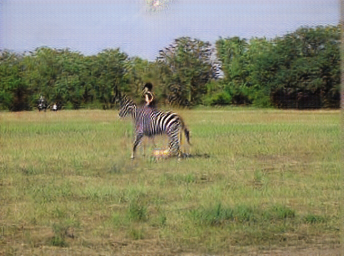

In [ ]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input) 


netG = ResNetGenerator()
model_path = '/content/gdrive/MyDrive/Datasets/Colab/horse2zebra/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)
netG.eval()

# 
from PIL import Image
from torchvision import transforms
preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.ToTensor()
      ])
img = Image.open("/content/gdrive/MyDrive/Datasets/Colab/horse2zebra/horseriding.jpg")
img
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img

In [ ]:
from google.colab import drive #https://www.reddit.com/r/deeplearning/comments/c3pisk/google_colab_filenotfounderror/
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## TorchHub

In [ ]:
dependencies = ['torch', 'math']

def some_entry_fn(*args, **kwargs):
  model = build_some_model(*args, **kwargs)
  return model

def another_entry_fn(*args, **kwargs):
  model = build_another_model(*args, **kwargs)
  return model

#https://github.com/pytorch/vision

import torch
from torch import hub
resnet18_model = hub.load('pytorch/vision:master','resnet18', pretrained=True)

#Google "github.com hubconf.py"

# Deep Learning with PyTorch (Chapter 3-4)


## Tesnor Operations, storage and conversions

In [ ]:
img_t = torch.randn(3, 5, 5) # shape [channels, rows, columns]
print("img_t\n",img_t)

weights = torch.tensor([0.2126, 0.7152, 0.0722])
print("weights",weights)

batch_t = torch.randn(2, 3, 5, 5) # shape [batch, channels, rows, columns]
#print("batch_t\n",batch_t)

img_gray_naive = img_t.mean(-3) #third from the end 
batch_gray_naive = batch_t.mean(-3) #third from the end 

img_gray_naive.shape, batch_gray_naive.shape

print("weights.unsqueeze(-1)",weights.unsqueeze(-1))
print("weights.unsqueeze(-2)",weights.unsqueeze(-2))

unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
print("unsqueezed_weights",unsqueezed_weights)
print("unsqueezed_weights (size)",unsqueezed_weights.size())
img_weights = (img_t * unsqueezed_weights)
batch_weights = (batch_t * unsqueezed_weights)
img_gray_weighted = img_weights.sum(-3)
batch_gray_weighted = batch_weights.sum(-3)
batch_weights.shape, batch_t.shape, unsqueezed_weights.shape



img_t
 tensor([[[-1.5305,  0.1500,  1.6666, -0.6851, -0.3028],
         [ 0.6886,  1.2715,  0.0430,  0.1837,  0.3674],
         [-1.3852,  1.6821, -0.9777,  0.2178,  0.7909],
         [ 0.8322, -0.0190,  0.4271, -0.0641,  0.0807],
         [ 1.5654,  0.1740, -1.8960,  0.2422,  0.3635]],

        [[-0.9657,  0.2183, -0.7606,  1.4365, -1.1182],
         [-0.5838,  1.8410, -1.6629, -0.7313, -0.0981],
         [-0.9721, -0.4961,  1.4430, -0.0368,  0.6513],
         [-0.2755, -0.4744,  0.9103, -0.7199, -1.3645],
         [ 0.8099, -1.0268,  0.0591, -1.2863,  0.6750]],

        [[-0.4245, -0.2945, -0.4672,  0.0392, -0.8282],
         [ 0.1201,  2.1079, -2.2220,  0.7564,  0.4529],
         [ 0.6043,  1.4170, -1.7436,  1.3794,  0.7742],
         [ 0.0087, -1.1590, -0.2013, -1.4498, -0.1886],
         [ 0.2906,  1.3446, -0.0188,  0.3774, -0.5520]]])
weights tensor([0.2126, 0.7152, 0.0722])
weights.unsqueeze(-1) tensor([[0.2126],
        [0.7152],
        [0.0722]])
weights.unsqueeze(-2) tensor(

In [ ]:
## Tensor, name space 
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])
img_named = img_t.refine_names(..., 'channels', 'rows', 'columns')
batch_named = batch_t.refine_names(..., 'channels', 'rows', 'columns')
print("img named:", img_named.shape, img_named.names)
print("batch named:", batch_named.shape, batch_named.names)

weights_aligned = weights_named.align_as(img_named) #    with missing dimensions added 
                                                    #  and existing ones permuted to the right order
weights_aligned.shape, weights_aligned.names


gray_named = (img_named * weights_aligned).sum('channels')
gray_named.shape, gray_named.names

# drop the names 
gray_plain = gray_named.rename(None)
gray_plain.shape, gray_plain.names

#in-place operations 
a = torch.ones(3, 2)
a.zero_()
a

img named: torch.Size([3, 5, 5]) ('channels', 'rows', 'columns')
batch named: torch.Size([2, 3, 5, 5]) (None, 'channels', 'rows', 'columns')


(torch.Size([5, 5]), ('rows', 'columns'))

In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
print("second_point",second_point)
print(second_point.storage())
print(second_point.storage_offset())
second_point.size()

points.stride()
# Accessing an element i, j in a 2D tensor results in accessing the storage_offset +
# stride[0] * i + stride[1] * j element in the storage. 


second_point = points[1]
second_point.size()
torch.Size([2])
second_point.storage_offset()
second_point.stride()

# because change to the subtensor will change the original tensor, we create a new tensor 
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1].clone()
second_point[0] = 10.0
points

#transposing without copying 
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points
points_t = points.t()
points_t

# make a non-contiguous vector contiguous 
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_t = points.t()
points_t_cont = points_t.contiguous()
points_t_cont

second_point tensor([5., 3.])
 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]
2


(1,)

In [ ]:
points_gpu = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]], device='cuda')
points_gpu = points.to(device='cuda')
points_gpu = points.to(device='cuda:0')

points = 2 * points #multiplication on the CPU
points_gpu=2* points.to(device='cuda')#multiplication on the GPU
points_cpu = points_gpu.to(device='cpu')# move points back to CPU

points_gpu = points.cuda() #defaults GPU to index 0
#points_gpu = points.cuda(0)
#points_cpu = points_gpu.cpu()

#conversion between numpty and Torch tensor
points = torch.ones(3, 4)
points_np = points.numpy()
points_np

points = torch.from_numpy(points_np)

# save our points tensor to an ourpoints.t file
torch.save(points, '../data/p1ch3/ourpoints.t')

with open('../data/p1ch3/ourpoints.t','wb') as f:
  torch.save(points, f)

points = torch.load('../data/p1ch3/ourpoints.t')

with open('../data/p1ch3/ourpoints.t','rb') as f:
  points = torch.load(f)

# serializing to HDF5
import h5py
f = h5py.File('../data/p1ch3/ourpoints.hdf5', 'w')
dset = f.create_dataset('coords', data=points.numpy())
f.close()

f = h5py.File('../data/p1ch3/ourpoints.hdf5', 'r')
dset = f['coords']
last_points = dset[-2:]

## Tensor with real-world data 

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Image data

In [ ]:
# working with images (2D image)
import imageio
img_arr = imageio.imread('/content/drive/MyDrive/Datasets/Colab/horse2zebra/horseriding.jpg')
print("image shape:",img_arr.shape) # HEIGHT * WEIGHT * CHANNEL 

img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1) #convert to PyTorch requirement: CHANNEL * HEIGHT * WEIGHT #uses the same storage 

batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

import os
data_dir = '../data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
            if os.path.splitext(name)[-1] == '.png']

for i, filename in enumerate(filenames):
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  img_t = torch.from_numpy(img_arr)
  img_t = img_t.permute(2, 0, 1)
  img_t = img_t[:3] #keep only the first 3 channels (eliminate the alpha channel)
  batch[i] = img_t
  #batch = batch.float()
  #batch /= 255.0 #normalize 

n_channels = batch.shape[1]
for c in range(n_channels):
  mean = torch.mean(batch[:, c])
  std = torch.std(batch[:, c])
  batch[:, c] = (batch[:, c] - mean) / std

image shape: (600, 800, 3)


FileNotFoundError: ignored

## Volumetric data (CT)

In [ ]:
#loading CT data 
import imageio
dir_path = "../data/p1ch4/volumetric-dicom/2-LUNG 3.0 B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0) #make a room for the channel dimension using unsqueeze
vol.shape


## Tabular Data

In [ ]:
import csv
import numpy as np
wine_path = "https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
#print("type",type(wineq_numpy))
#print(wineq_numpy.shape)

import requests

r = requests.get(wine_path)
first_row = r.text.splitlines()[0]
col_names = first_row.split(";")
#print(col_names)

# convert numpy array to PyTorch tensor
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype
#print(wineq.shape)

# read csv data 
data = wineq[:,:-1] # all row, all col (except last col)
print(wineq[:,-1])
 
#treat target variables as integers (induces an ordering on the scores)
target = wineq[:, -1].long()
target, target.shape

# treat traget variables as categories 
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0) # underscore means taht the tensor will modify the existing tensor

#normailize inputs 
data_mean = torch.mean(data, dim=0)
data_mean

data_var = torch.var(data, dim=0)
data_var

data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

# find bad wines 
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

bad_data = data[bad_indexes]
bad_data.shape

# define quality of wines 
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

# all variables for the 3 categories 
for i, args in enumerate(zip(col_names, bad_mean, mid_mean, good_mean)):
  print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

# use total_sulfur_threshold as the sole predictors for wine quality
total_sulfur_threshold = 141.83
total_sulfur_data = data[:,6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

# good wines (there are 500 good wines than over threshold predicted)
actual_indexes = target > 5
actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

# check how well our predictions were 
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()
n_matches, n_matches / n_predicted, n_matches / n_actual


tensor([6., 6., 6.,  ..., 6., 7., 6.])
 0 "fixed acidity"        7.60   6.89   6.73
 1 "volatile acidity"     0.33   0.28   0.27
 2 "citric acid"          0.34   0.34   0.33
 3 "residual sugar"       6.39   6.71   5.26
 4 "chlorides"            0.05   0.05   0.04
 5 "free sulfur dioxide"  53.33  35.42  34.55
 6 "total sulfur dioxide" 170.60 141.83 125.25
 7 "density"              0.99   0.99   0.99
 8 "pH"                   3.19   3.18   3.22
 9 "sulphates"            0.47   0.49   0.50
10 "alcohol"             10.34  10.26  11.42


(2018, 0.74000733406674, 0.6193984039287906)

## Time Series Data

In [ ]:
time_series_path ="https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch4/bike-sharing-dataset/hour-fixed.csv"
bikes_numpy =np.loadtxt(
            time_series_path,
            dtype=np.float32,
            delimiter=",",
            skiprows=1,
            converters={1: lambda x: float(x[8:10])}) #Converts date strings to numbers corresponding to the
                                                      #day of the month in column 1

bikes = torch.from_numpy(bikes_numpy)
bikes_numpy.shape #L: sequence of length L; L=24: 1/hr/day
                  #C: 17 channels
                  #N: number of samples

print(bikes.shape, bikes.stride())

# create dummy variables (method 1)
daily_bikes = bikes.view(-1, 24, bikes.shape[1]) 
daily_bikes.shape, daily_bikes.stride() #(N,L,C)

daily_bikes = daily_bikes.transpose(1, 2) # to get (N,L,C) to (N,C,L)
daily_bikes.shape, daily_bikes.stride() 

first_day = bikes[:24].long()
print("shape of first_day",first_day.shape)
#print(first_day)
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:,9]

weather_onehot.scatter_(dim=1, index=first_day[:,9].unsqueeze(1).long() - 1,value=1.0) #weather situation ranges from 1 to 4, while indices are 0-based
torch.cat((bikes[:24], weather_onehot), 1)[:1] #concatenate the column dimension (1)

#create dummy variables (method 2)
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4,
daily_bikes.shape[2])
daily_weather_onehot.shape
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

# treat the weather level as a continous variable 
daily_bikes[:, 9, :] = (daily_bikes[:, 9, :] - 1.0) / 3.0

# normalize to [0,1]
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - temp_min)/ (temp_max - temp_min))

#normalize by varaince
temp = daily_bikes[:, 10, :]
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - torch.mean(temp))/ torch.std(temp))

torch.Size([17520, 17]) (17, 1)
shape of first_day torch.Size([24, 17])


torch.Size([730, 4, 24])

## Text Data

In [ ]:
# https://www.gutenberg.org/
# https://www.english-corpora.org/

# convert text to numbers
#book_path = "https://www.gutenberg.org/files/1342/1342-0.txt"
import torch

with open('/content/drive/MyDrive/Datasets/Colab/jane_austin.txt', encoding='utf8') as f:
  text = f.read()
lines = text.split('\n')
line = lines[200]
print(line)
# One-hot-encoding characters 

letter_t = torch.zeros(len(line), 128)
letter_t.shape

for i, letter in enumerate(line.lower().strip()):
  letter_index = ord(letter) if ord(letter) < 128 else 0 #directional doubles are not in ASCII, we screen them out 
  letter_t[i][letter_index] = 1

# One-hot encoding whole words
def clean_words(input_str):
  punctuation = '.,;:"!?”“_-'
  word_list = input_str.lower().replace('\n',' ').split()
  word_list = [word.strip(punctuation) for word in word_list]
  return word_list
words_in_line = clean_words(line)
#print(words_in_line)

#map words to indexes 
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}
#len(word2index_dict), word2index_dict['impossible']

word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
  word_index = word2index_dict[word]
  word_t[i][word_index] = 1
  print('{:2} {:4} {}'.format(i, word_index, word))

print(word_t.shape)



      Michaelmas, and some of his servants are to be in the house by
 0 4146 michaelmas
 1  424 and
 2 6022 some
 3 4487 of
 4 3207 his
 5 5820 servants
 6  526 are
 7 6521 to
 8  723 be
 9 3393 in
10 6441 the
11 3244 house
12  978 by
torch.Size([13, 7258])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Audio data

In [ ]:
#https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/p1ch4/X_video_cockatoo.ipynb

# Deep Learning with PyTorch (Chapter 5-6)

## Backprop

shapes: x: torch.Size([]), y: torch.Size([3, 1])
 z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])
Epoch 1, Loss 1763.884766
Epoch 2, Loss 5802484.500000
Epoch 3, Loss 19408029696.000000
Epoch 4, Loss 64915905708032.000000
Epoch 5, Loss 217130525461053440.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183416467662896627712.000000
Epoch 8, Loss 8125122549611731432050262016.000000
Epoch 9, Loss 27176882120842590626938030653440.000000
Epoch 10, Loss 90901105189019073810297959556841472.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Ep

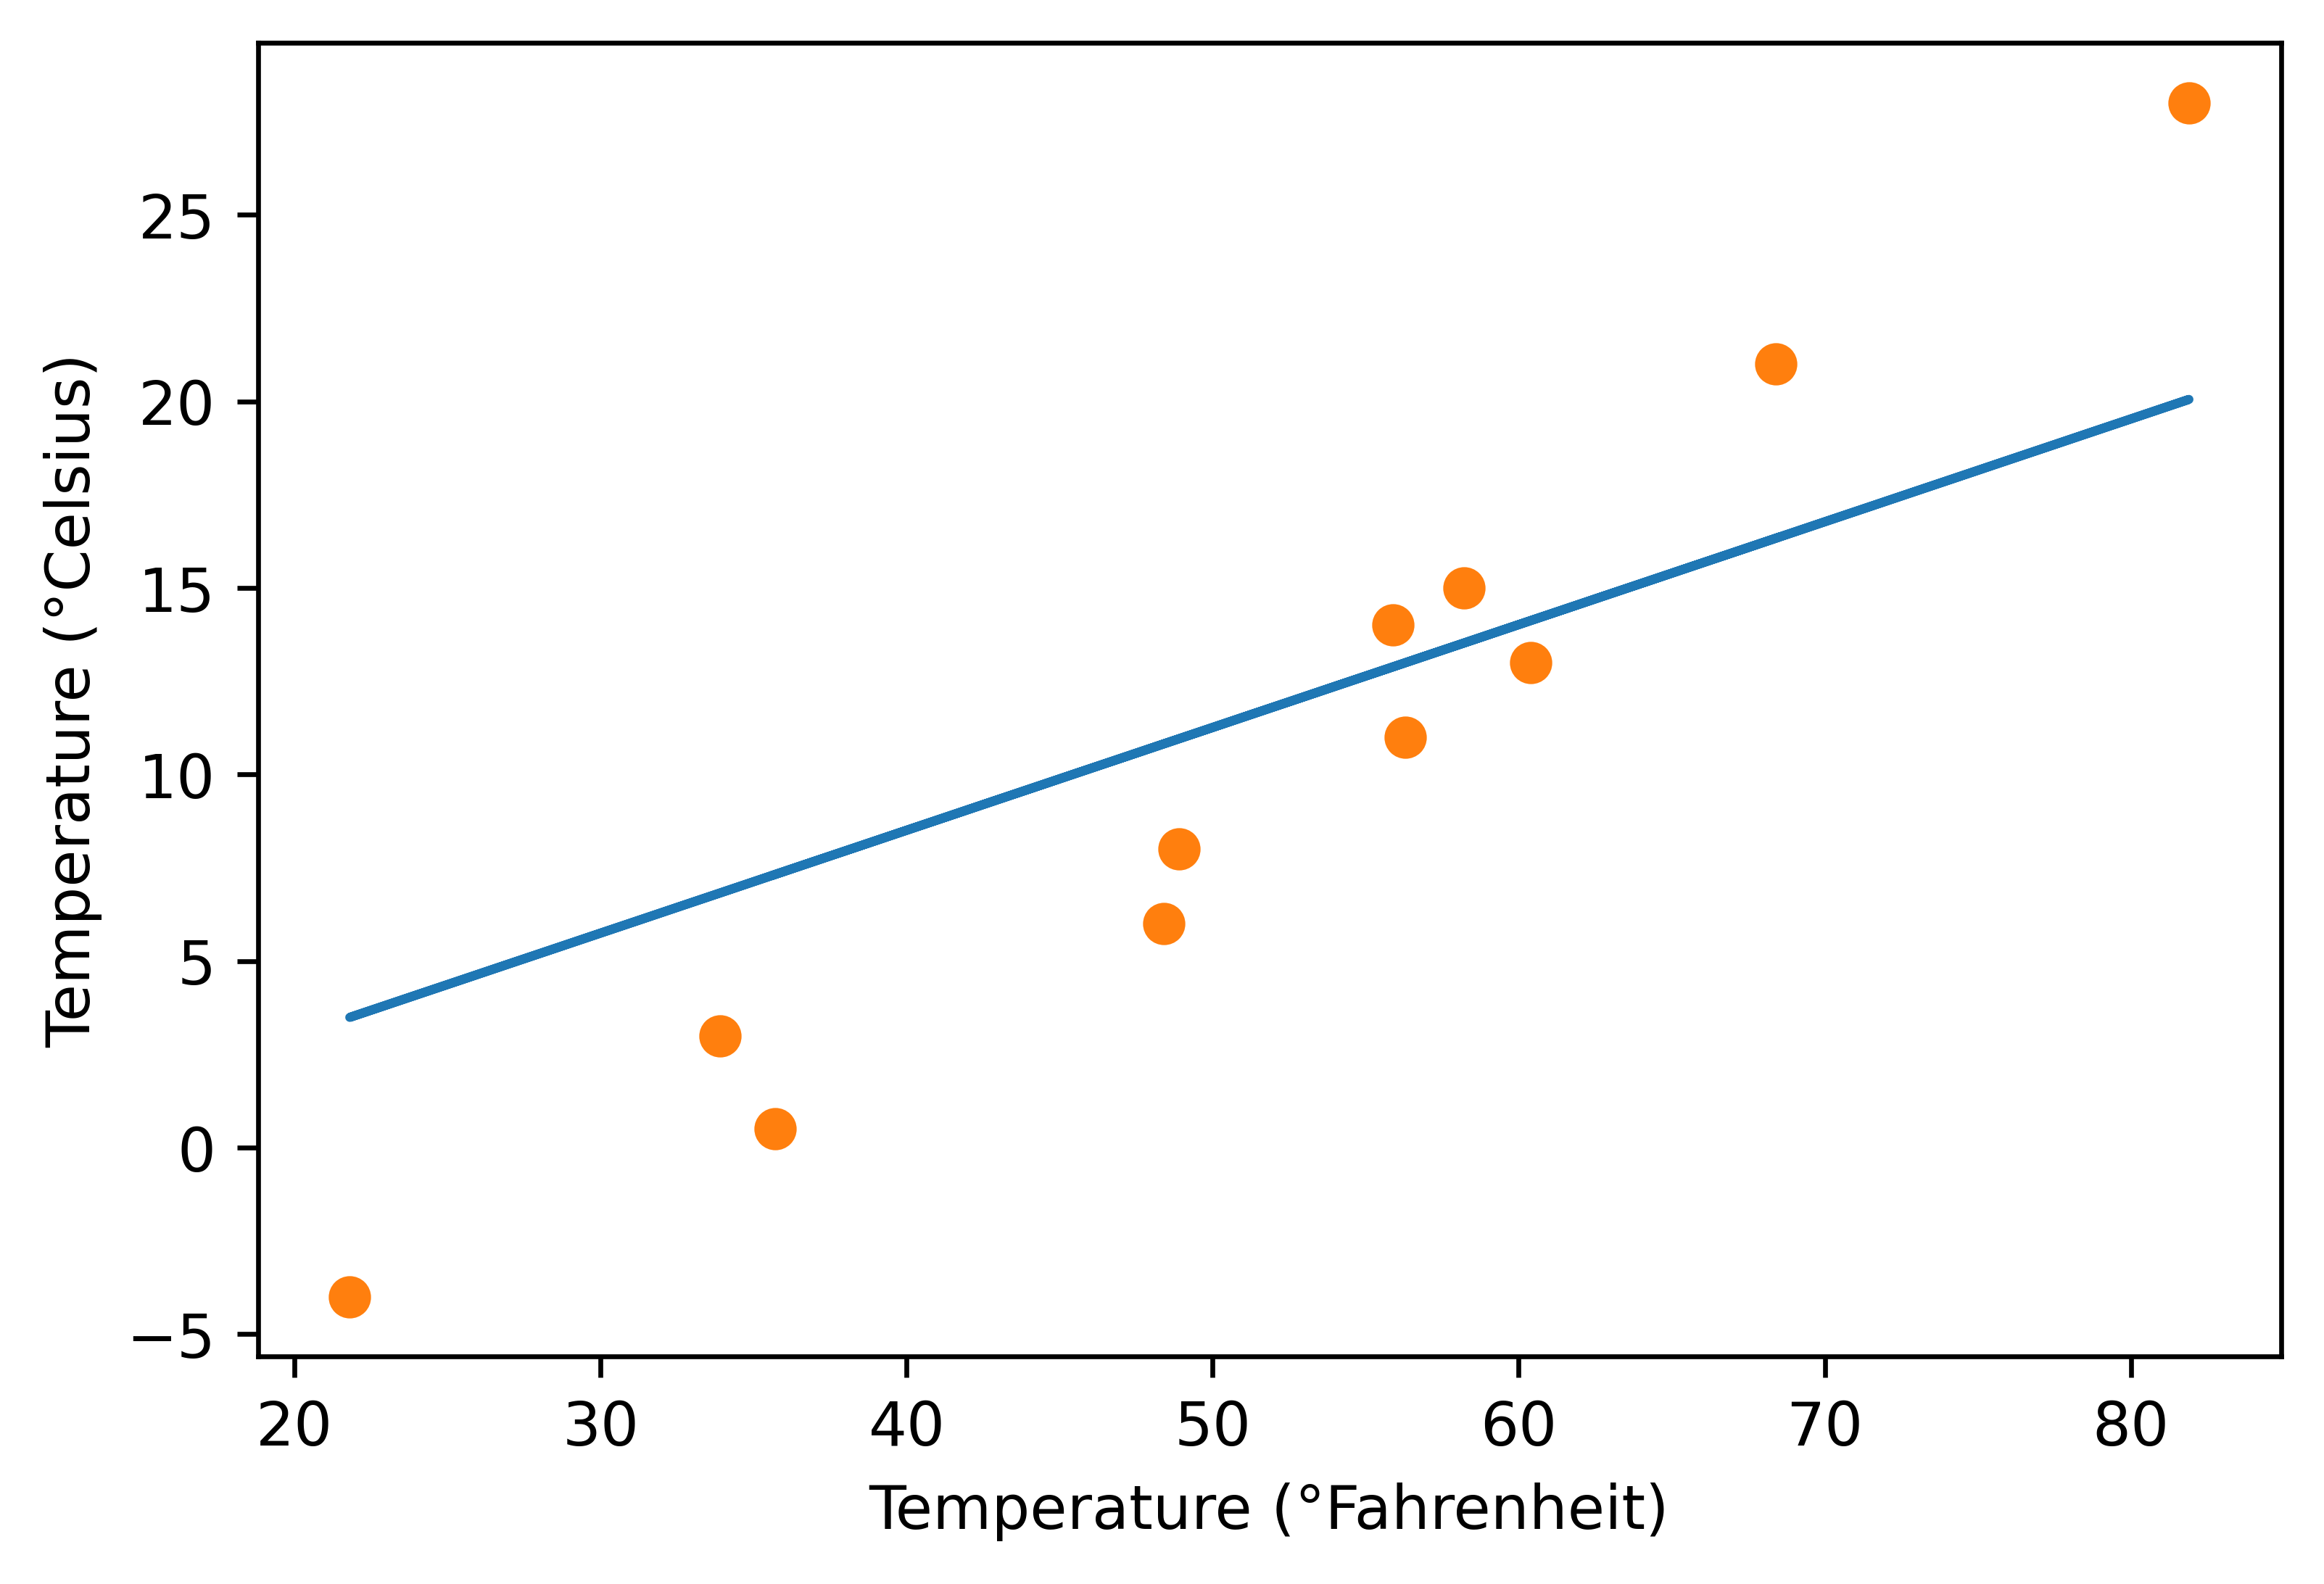

In [ ]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

loss = loss_fn(t_p, t_c)
loss

x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")


print(f" z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)


delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

#gradient 
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs


def dmodel_dw(t_u, w, b):
  return t_u

 
def dmodel_db(t_u, w, b):
  return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

training_loop(  n_epochs = 100,
                learning_rate = 1e-2,
                params = torch.tensor([1.0, 0.0]),
                t_u = t_u,
                t_c = t_c) #losses blow up


training_loop(  n_epochs = 100,
                learning_rate = 1e-4,
                params = torch.tensor([1.0, 0.0]),
                t_u = t_u,
                t_c = t_c) #losses stablize with small leranring rate


#normalize inputs 
t_un = 0.1 * t_u
params= training_loop(  n_epochs = 100,
                learning_rate = 1e-2,
                params = torch.tensor([1.0, 0.0]),
                t_u = t_un,
                t_c = t_c)


%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')


In [ ]:

#backpropagate everything with autograd
def model(t_u, w, b):
  return w * t_u + b
 
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad


if params.grad is not None:
  params.grad.zero_()

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_()
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    loss.backward()

    with torch.no_grad():
      params -= learning_rate * params.grad
    
    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

training_loop(n_epochs = 5000,
              learning_rate = 1e-2,
              params = torch.tensor([1.0, 0.0], requires_grad=True),
              t_u = t_un,
              t_c = t_c)

#other types of optimiztions
import torch.optim as optim
dir(optim)

#gradient descent optimizing 
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step() #forgot to zero the out the gradient

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

## Split dataset

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u


def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1, n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)
    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
  if epoch <= 3 or epoch % 500 == 0:
    print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
    f" Validation loss {val_loss.item():.4f}")
  return params


params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) #can change the SGD to Adam

training_loop( n_epochs = 3000,
              optimizer = optimizer,
              params = params,
              train_t_u = train_t_un,
              val_t_u = val_t_un,
              train_t_c = train_t_c,
              val_t_c = val_t_c)



Epoch 3000, Training loss 3.3497, Validation loss 1.0532


tensor([  5.3264, -17.1021], requires_grad=True)

## Simple Linear Regression 

In [ ]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

# load data 
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

#training and validation set
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

linear_model.weight
linear_model.bias

x = torch.ones(1)
linear_model(x)

x = torch.ones(10, 1)
linear_model(x)

#batch inputs 
x = torch.ones(10, 1)
linear_model(x)

#training 
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

linear_model.parameters()
print("\n")
list(linear_model.parameters())

#training 
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

#built-in loss function
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)
training_loop(
n_epochs = 3000,
optimizer = optimizer,
model = linear_model,
loss_fn = nn.MSELoss(),
t_u_train = t_un_train,
t_u_val = t_un_val,
t_c_train = t_c_train,
t_c_val = t_c_val)
print()
print(linear_model.weight)
print(linear_model.bias)



Epoch 1, Training loss 276.7828, Validation loss 33.5129
Epoch 1000, Training loss 4.2137, Validation loss 7.4408
Epoch 2000, Training loss 2.5767, Validation loss 4.9601
Epoch 3000, Training loss 2.4234, Validation loss 5.4284

Parameter containing:
tensor([[5.4762]], requires_grad=True)
Parameter containing:
tensor([-17.7578], requires_grad=True)
Epoch 1, Training loss 190.3837, Validation loss 21.5954
Epoch 1000, Training loss 4.2951, Validation loss 7.6222
Epoch 2000, Training loss 2.5843, Validation loss 4.9546
Epoch 3000, Training loss 2.4242, Validation loss 5.4210

Parameter containing:
tensor([[5.4743]], requires_grad=True)
Parameter containing:
tensor([-17.7464], requires_grad=True)


## Replacing the Linear Model

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])
hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])
Epoch 1, Training loss 222.9297, Validation loss 26.1618
Epoch 1000, Training loss 5.2370, Validation loss 3.8793
Epoch 2000, Training loss 5.1017, Validation loss 0.7394
Epoch 3000, Training loss 3.1820, Validation loss 0.8966
Epoch 4000, Training loss 2.3259, Validation loss 1.4601
Epoch 5000, Training loss 1.9927, Validation loss 2.0104
output tensor([[-2.6782],
        [ 8.0896]], grad_fn=<AddmmBackward>)
answer tensor([[-4.],
        [ 6.]])
hidden tensor([[ 1.0283e+01],
        [-8.9423e+00],
        [-9.9798e+00],
        [ 2.9217e-01],
        [-4.5866e+00],
        [ 1.2838e-01],
        [-2.7079e-03],
        [ 9.3045e+00]])


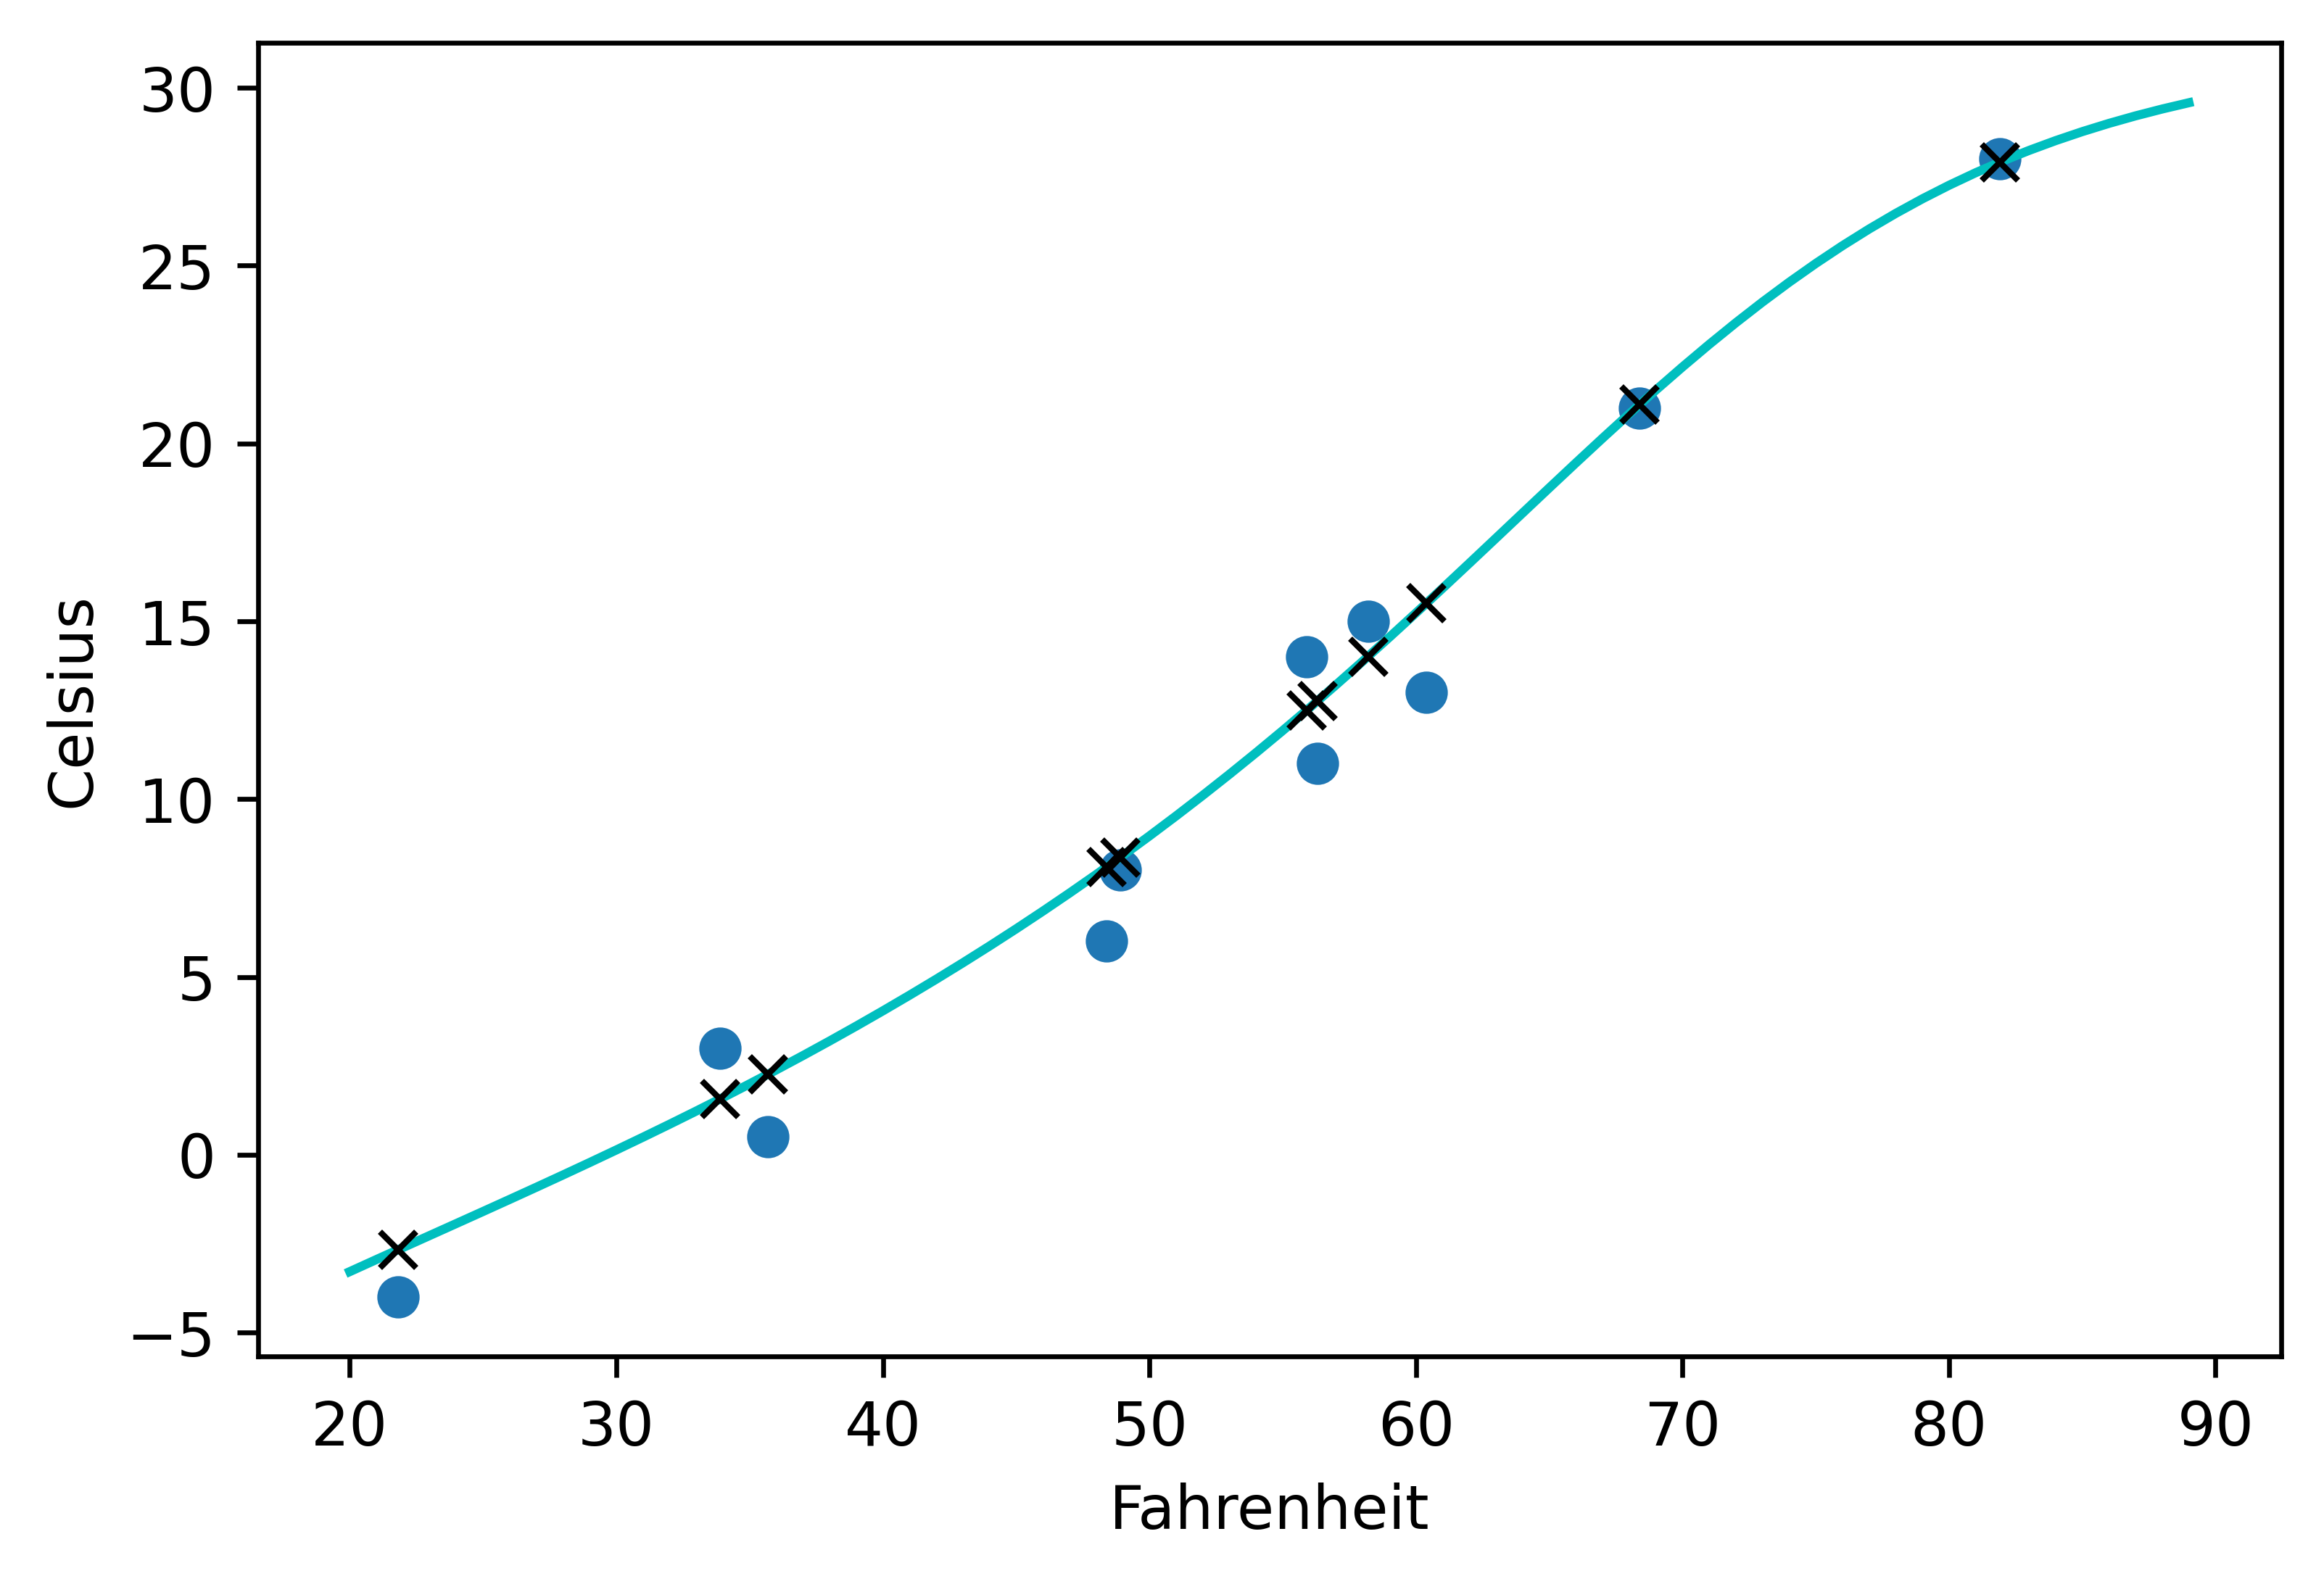

In [ ]:
seq_model = nn.Sequential(
nn.Linear(1, 13),
nn.Tanh(),
nn.Linear(13, 1))
seq_model

[param.shape for param in seq_model.parameters()]
for name, param in seq_model.named_parameters():
  print(name, param.shape)

# a model as an ordered dictionary
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
('hidden_linear', nn.Linear(1, 8)),
('hidden_activation', nn.Tanh()),
('output_linear', nn.Linear(8, 1))
]))
seq_model

for name, param in seq_model.named_parameters():
  print(name, param.shape)

seq_model.output_linear.bias
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(
        n_epochs = 5000,
        optimizer = optimizer,
        model = seq_model,
        loss_fn = nn.MSELoss(),
        t_u_train = t_un_train,
        t_u_val = t_un_val,
        t_c_train = t_c_train,
        t_c_val = t_c_val)


print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)


from matplotlib import pyplot as plt
t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

# Deep learning with PyTorch (Chapter 7-8)

## Load data 

0it [00:00, ?it/s]

Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified
50000


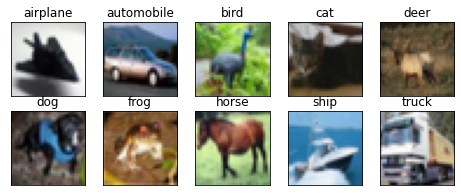

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419F739F50> 1 automobile


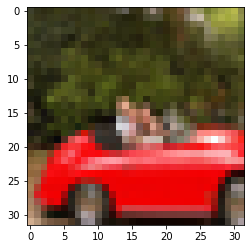

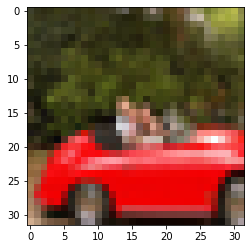

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


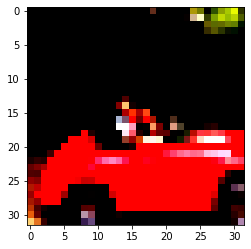

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

# cifar datasets 
from torchvision import datasets

data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)
print(len(cifar10))


# array of images, define class names 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()




img, label = cifar10[99]
print(img, label ,class_names[label])
plt.imshow(img)
plt.show()

type(cifar10).__mro__
    #(torchvision.datasets.cifar.CIFAR10,
    #torchvision.datasets.vision.VisionDataset,
    #torch.utils.data.dataset.Dataset,
    #object)

# list of image transformations 
from torchvision import transforms
dir(transforms)

from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor()) # convert numpy to tensor, C * H * W
img_t, _ = tensor_cifar10[99]

type(img_t)
img_t.shape, img_t.dtype
img_t.min(), img_t.max()
plt.imshow(img_t.permute(1, 2, 0))  # hanges the order of the axes from C × H × W to H × W × C
plt.show()

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

imgs.view(3, -1).mean(dim=1)  # <1>
imgs.view(3, -1).std(dim=1)
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

## Small neural net

cifar2 [(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F41F296EB90>, 1), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D934750>, 1), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D934E90>, 1), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D934A10>, 1), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D934610>, 0), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D934A50>, 0), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D934E10>, 0), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D934690>, 1), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D9347D0>, 1), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D934210>, 1), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D934050>, 1), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D9340D0>, 0), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D934C10>, 1), (<PIL.Image.Image image mode=RGB size=32x32 at 0x7F419D934890>, 1), (<PIL.Image.Image image mode=RGB size=32

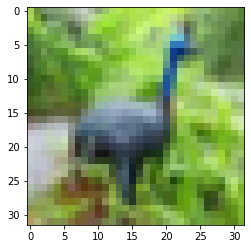

KeyboardInterrupt: ignored

In [ ]:

# stack small neural networks 

import torch
import torch.nn as nn
n_out = 2
model = nn.Sequential(
  nn.Linear(
    3072,
    512,
  ),
  nn.Tanh(),
  nn.Linear(
    512,
    n_out,
  )
)

#define the softmax function 
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)
softmax(x).sum() #sum to 1 

softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],
                 [1.0, 2.0, 3.0]])
softmax(x)


model = nn.Sequential(
  nn.Linear(3072, 512),
  nn.Tanh(),
  nn.Linear(512, 2),
  nn.Softmax(dim=1)
)

# reshape datasets 

label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
  for img, label in cifar10
  if label in [0, 2]]

cifar2_copy = [(to_tensor(img), label_map[label])
  for img, label in cifar10
  if label in [0, 2]]
print("cifar2",cifar2)

cifar2_val = [(img, label_map[label])
  for img, label in cifar10_val
  if label in [0, 2]]


cifar2_val_copy = [(to_tensor(img), label_map[label])
  for img, label in cifar10_val
  if label in [0, 2]]

img, _ = cifar2[0]
img = to_tensor(img)
plt.imshow(img.permute(1, 2, 0))
plt.show()

#flatten our image 
img_batch = img.view(-1).unsqueeze(0)
out = model(img_batch)
out

#dimension 1 
_, index = torch.max(out, dim=1)
index

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
    )
loss = nn.NLLLoss()
img, label = cifar2[0]
img = to_tensor(img)
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))
 
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
nn.Linear(3072, 512),
nn.Tanh(),
nn.Linear(512, 2),
nn.LogSoftmax(dim=1))
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100

for epoch in range(n_epochs):
  for img, label in cifar2:
    img = to_tensor(img)
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_fn(out, torch.tensor([label]))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))



In [ ]:
# uniform sampling after schuffling data at each epoch (with DataLoader)
import torch
import torch.nn as nn
import torch.optim as optim

#print("first image",cifar2[0])
#print("first image (type)",type(cifar2[0]))
#print("first image (tuple 1)",cifar2[0][0])
#print("to_tensor first image (tuple 1)",to_tensor(cifar2[0][0]))
#print("first image (tuple 2)",cifar2[0][1])

train_loader = torch.utils.data.DataLoader(cifar2_copy, batch_size=64,
                                           shuffle=True)
print(train_loader)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.596419
Epoch: 1, Loss: 0.533950
Epoch: 2, Loss: 0.366627
Epoch: 3, Loss: 0.538628
Epoch: 4, Loss: 0.360114
Epoch: 5, Loss: 0.368383
Epoch: 6, Loss: 0.449647
Epoch: 7, Loss: 0.286412
Epoch: 8, Loss: 0.642286
Epoch: 9, Loss: 0.457140
Epoch: 10, Loss: 0.468570
Epoch: 11, Loss: 0.495798
Epoch: 12, Loss: 0.577312
Epoch: 13, Loss: 0.438911
Epoch: 14, Loss: 0.265907
Epoch: 15, Loss: 0.519207
Epoch: 16, Loss: 0.400240
Epoch: 17, Loss: 0.545714
Epoch: 18, Loss: 0.564876
Epoch: 19, Loss: 0.585854
Epoch: 20, Loss: 0.518899
Epoch: 21, Loss: 0.262271
Epoch: 22, Loss: 0.239616
Epoch: 23, Loss: 0.347198
Epoch: 24, Loss: 0.835109
Epoch: 25, Loss: 0.411636
Epoch: 26, Loss: 0.579412
Epoch: 27, Loss: 0.418651
Epoch: 28, Loss: 0.221717
Epoch: 29, Loss: 0.332583
Epoch: 30, Loss: 0.163122
Epoch: 31, Loss: 0.226405
Epoch: 32, Loss: 0.293510
Epoch: 33, Loss: 0.304748
Epoch: 34, Loss: 0.314083
Epoch: 35, Loss: 0.223730
Epoch: 36, Loss: 0.212954
Epoch: 37, Loss: 0.676537
Epoch: 38, Loss: 0.641

In [ ]:

# test accuracy on validation data 

val_loader = torch.utils.data.DataLoader(cifar2_copy, batch_size=64,shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))



Accuracy: 0.848900


In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val_copy, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

#https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/p1ch7/2_birds_airplanes.ipynb

Accuracy: 0.810500


In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2_copy, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.526384
Epoch: 1, Loss: 0.566437
Epoch: 2, Loss: 0.542789
Epoch: 3, Loss: 0.653243
Epoch: 4, Loss: 0.351223
Epoch: 5, Loss: 0.743732
Epoch: 6, Loss: 0.640807
Epoch: 7, Loss: 0.249302
Epoch: 8, Loss: 0.246282
Epoch: 9, Loss: 0.697356
Epoch: 10, Loss: 0.511317
Epoch: 11, Loss: 0.479356
Epoch: 12, Loss: 0.348833
Epoch: 13, Loss: 0.443651
Epoch: 14, Loss: 0.502002
Epoch: 15, Loss: 0.579395
Epoch: 16, Loss: 0.499409
Epoch: 17, Loss: 0.493107
Epoch: 18, Loss: 0.765980
Epoch: 19, Loss: 0.258957
Epoch: 20, Loss: 0.588702
Epoch: 21, Loss: 0.719795
Epoch: 22, Loss: 0.493013
Epoch: 23, Loss: 0.498843
Epoch: 24, Loss: 0.462486
Epoch: 25, Loss: 0.316365
Epoch: 26, Loss: 0.556051
Epoch: 27, Loss: 0.388679
Epoch: 28, Loss: 0.708521
Epoch: 29, Loss: 0.410026
Epoch: 30, Loss: 0.594074
Epoch: 31, Loss: 0.450669
Epoch: 32, Loss: 0.786812
Epoch: 33, Loss: 0.396066
Epoch: 34, Loss: 0.328823
Epoch: 35, Loss: 0.443893
Epoch: 36, Loss: 0.586746
Epoch: 37, Loss: 0.451612
Epoch: 38, Loss: 0.358

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2_copy, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.872300


In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val_copy, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.836500


In [ ]:
sum([p.numel() for p in model.parameters()])
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [ ]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

## Convolution Neural Network

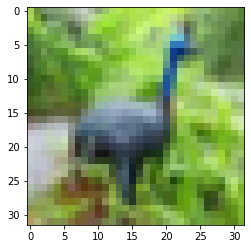

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
torch.Size([16, 3, 3, 3]) torch.Size([16])


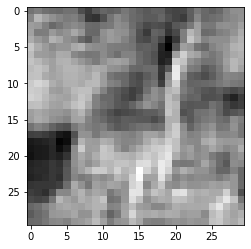

output size: torch.Size([1, 16, 30, 30])


In [ ]:
img, _ = cifar2_copy[0]
plt.imshow(img.permute(1, 2, 0), cmap='gray') #why is it not gray?
plt.show()


#define convolution 
conv = nn.Conv2d(3, 16, kernel_size=3)
print(conv)
print(conv.weight.shape, conv.bias.shape)

output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()
print("output size:",output.shape) #we lost some pixels in the convolution



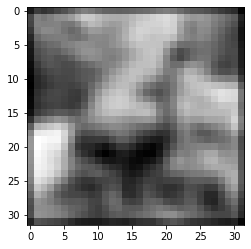

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

with torch.no_grad():
  conv.bias.zero_()
with torch.no_grad():
  conv.weight.fill_(1.0 / 9.0)

output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
# try a filter 
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
with torch.no_grad():
  conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
  [-1.0, 0.0, 1.0],
  [-1.0, 0.0, 1.0]])
  conv.bias.zero_()

#try pooling 
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    # ...
    nn.Linear(8 * 8 * 8, 32),
    nn.Tanh(),
    nn.Linear(32, 2))

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

#model(img.unsqueeze(0)) #?!

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8) # <1>
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out


model = Net()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

model = Net()
model(img.unsqueeze(0))

tensor([[0.0513, 0.1183]], grad_fn=<AddmmBackward>)

In [ ]:
import datetime  # <1>

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            
            outputs = model(imgs)  # <4>
            
            loss = loss_fn(outputs, labels)  # <5>

            optimizer.zero_grad()  # <6>
            
            loss.backward()  # <7>
            
            optimizer.step()  # <8>

            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  # <10>

train_loader = torch.utils.data.DataLoader(cifar2_copy, batch_size=64,
                                           shuffle=True)  # <1>

model = Net()  #  <2>
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #  <3>
loss_fn = nn.CrossEntropyLoss()  #  <4>

training_loop(  # <5>
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2021-12-18 16:47:37.425201 Epoch 1, Training loss 0.6731384286455288
2021-12-18 16:48:22.465150 Epoch 10, Training loss 0.4599460169767878
2021-12-18 16:49:13.431777 Epoch 20, Training loss 0.3639032764799276
2021-12-18 16:50:01.026113 Epoch 30, Training loss 0.3292252715605839
2021-12-18 16:50:59.677978 Epoch 40, Training loss 0.30973984756667144
2021-12-18 16:51:50.077300 Epoch 50, Training loss 0.2939729446153732
2021-12-18 16:52:42.155490 Epoch 60, Training loss 0.27920443958537594
2021-12-18 16:53:26.719779 Epoch 70, Training loss 0.2644435127449643
2021-12-18 16:54:11.137719 Epoch 80, Training loss 0.25420821856731063
2021-12-18 16:54:55.841120 Epoch 90, Training loss 0.2413182734114349
2021-12-18 16:55:40.688121 Epoch 100, Training loss 0.23190896122888394


In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2_copy, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val_copy, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.89
Accuracy val: 0.86


In [ ]:
# save torch model 
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')
loaded_model = Net()  # <1>
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt'))
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f"Training on device {device}.")

In [ ]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)  # <1>
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = Net().to(device=device)  # <1>
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
all_acc_dict = collections.OrderedDict()

def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <1>
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        accdict[name] = correct / total
    return accdict

all_acc_dict["baseline"] = validate(model, train_loader, val_loader)

In [ ]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt',
                                        map_location=device))

In [ ]:
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetWidth().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

validate(model, train_loader, val_loader)

In [ ]:
class NetWidth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out


model = NetWidth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)
sum(p.numel() for p in model.parameters())

In [ ]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn,
                        train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum()
                          for p in model.parameters())  # <1>
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))
            
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l2reg(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)

In [ ]:
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
model = NetDropout(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

In [ ]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, 
                               padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
model = NetBatchNorm(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["batch_norm"] = validate(model, train_loader, val_loader)

In [ ]:
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out
        
model = NetDepth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["depth"] = validate(model, train_loader, val_loader)

In [ ]:
class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out
model = NetRes(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res"] = validate(model, train_loader, val_loader)

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3,
                              padding=1, bias=False)  # <1>
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')  # <2>
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

model = NetResDeep(n_chans1=32, n_blocks=100).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res deep"] = validate(model, train_loader, val_loader)  

trn_acc = [v['train'] for k, v in all_acc_dict.items()]
val_acc = [v['val'] for k, v in all_acc_dict.items()]

width =0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='val')
plt.xticks(np.arange(len(val_acc))+ width/2, list(all_acc_dict.keys()),
           rotation=60)
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim(0.7, 1)
plt.savefig('accuracy_comparison.png', bbox_inches='tight')
plt.show()